In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Путь к загруженным данным

In [273]:
WORKDIR = 'D:\\python\\names\\'

In [274]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(WORKDIR, year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [275]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

In [276]:
name_dynamics.query('Name == ["Ruth", "Robert"]')

Count
Year Name         
1900 Robert   3845
     Ruth     4781
1905 Robert   3431
     Ruth     5088
1910 Robert   5638
     Ruth     7247
1915 Robert  28854
     Ruth    21926
1920 Robert  48886
     Ruth    26155
1925 Robert  61244
     Ruth    22326
1930 Robert  62576
     Ruth    15010
1935 Robert  56750
     Ruth    10041
1940 Robert  61401
     Ruth     8922
1945 Robert  70130
     Ruth     8062
1950 Robert  83778
     Ruth     7138
1955 Robert  83918
     Ruth     6202
1960 Robert  72649
     Ruth     4960
1965 Robert  63392
     Ruth     3242
1970 Robert  57533
     Ruth     1829
1975 Robert  35580
     Ruth     1235
1980 Robert  34530
     Ruth     1262
1985 Robert  32325
     Ruth     1125
1990 Robert  28976
     Ruth      913
1995 Robert  18624
     Ruth      856
2000 Robert  13758
     Ruth      902

In [277]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name')

Count         
Name   Robert     Ruth
Year                  
1900   3845.0   4781.0
1905   3431.0   5088.0
1910   5638.0   7247.0
1915  28854.0  21926.0
1920  48886.0  26155.0
1925  61244.0  22326.0
1930  62576.0  15010.0
1935  56750.0  10041.0
1940  61401.0   8922.0
1945  70130.0   8062.0
1950  83778.0   7138.0
1955  83918.0   6202.0
1960  72649.0   4960.0
1965  63392.0   3242.0
1970  57533.0   1829.0
1975  35580.0   1235.0
1980  34530.0   1262.0
1985  32325.0   1125.0
1990  28976.0    913.0
1995  18624.0    856.0
2000  13758.0    902.0

Метод `unstack`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html

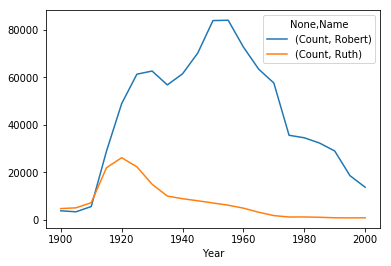

In [278]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

Метод `plot`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

Метод `bar`

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html

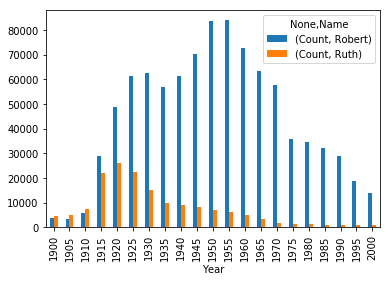

In [279]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

In [280]:
names = pd.read_csv('{}/yob1950.txt'.format(WORKDIR), names=['Name', 'Gender', 'Count'])
names.head(10)

,Name,Gender,Count
0,Linda,F,80439
1,Mary,F,65485
2,Patricia,F,47948
3,Barbara,F,41559
4,Susan,F,38019
5,Nancy,F,29619
6,Deborah,F,29067
7,Sandra,F,28896
8,Carol,F,26163
9,Kathleen,F,25704


In [281]:
top_names = names[names.Name.str.startswith('R')].groupby('Name').sum().sort_values(by='Count', ascending=False).head(10)
top_names

,Count
Name,
Robert,83778
Richard,51111
Ronald,29985
Roger,12578
Raymond,11218
Rebecca,9443
Ruth,7138
Roy,6491
Rita,6439


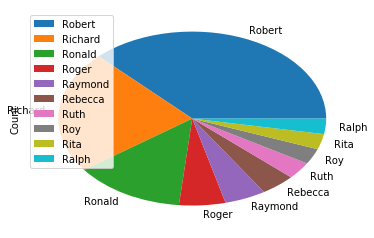

In [282]:
top_names.plot.pie(y='Count')

In [283]:
top_names_1 = names[names.Name.str.startswith('R')].sort_values(by='Count', ascending=False).head(10)


In [284]:
top_names_2 = top_names_1.groupby('Name').sum().sort_values(by='Count', ascending=False).head(10)
top_names_2

,Count
Name,
Robert,83575
Richard,51014
Ronald,29917
Roger,12551
Raymond,11180
Rebecca,9426
Ruth,7128
Roy,6459
Rita,6425


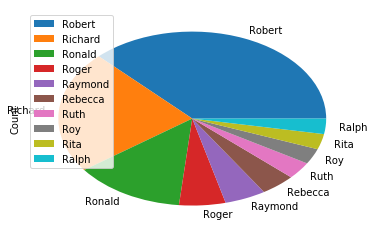

In [285]:
top_names_2.plot.pie(y='Count')

In [286]:
consonant_letters_names = {}
for year in range(1900, 2001, 1):
    consonant_letters_names[year] = pd.read_csv('{}/yob{}.txt'.format(WORKDIR, year),
        names=['Name', 'Gender', 'Count']                                     
    )
consonant_letters = pd.concat(consonant_letters_names, names=['Year', 'Pos'])

In [287]:
consonant_letters_all_names = consonant_letters.groupby('Name').sum().sort_values(by='Count', ascending=False)
consonant_letters_all_names.head(10)

,Count
Name,
James,4810284
John,4739898
Robert,4638931
Michael,4023398
Mary,3853689
William,3655345
David,3351321
Richard,2493115
Joseph,2289760


In [288]:
consonant_letters_all_names = consonant_letters_all_names.reset_index()

In [289]:
consonant_letters_all_names.head(10)

,Name,Count
0,James,4810284
1,John,4739898
2,Robert,4638931
3,Michael,4023398
4,Mary,3853689
5,William,3655345
6,David,3351321
7,Richard,2493115
8,Joseph,2289760
9,Charles,2189677


In [290]:
def count_to_consonant(row):
    amount_consonant = 0
    for letter in row.Name.lower():
        for consonant in ['b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'z']:
                          if letter == consonant:
                              amount_consonant +=1
#     print(letter)
#     print(amount_consonant)
    return amount_consonant

consonant_letters_all_names['Consonant'] = consonant_letters_all_names.apply(count_to_consonant, axis=1)
consonant_letters_all_names.head(10)



,Name,Count,Consonant
0,James,4810284,3
1,John,4739898,3
2,Robert,4638931,4
3,Michael,4023398,4
4,Mary,3853689,2
5,William,3655345,4
6,David,3351321,3
7,Richard,2493115,5
8,Joseph,2289760,4
9,Charles,2189677,5


In [294]:
consonant_letters_all_names = consonant_letters_all_names.groupby('Consonant').sum().sort_values(by='Count', ascending=False)

In [295]:
consonant_letters_all_names.reset_index()

,Consonant,Count
0,3,98123844
1,4,85093088
2,2,48248189
3,5,35925676
4,1,5141925
5,6,4040995
6,8,1777545
7,7,149035
8,0,3151
9,9,1247


In [296]:
consonant_letters_all_names.plot.scatter(x='Consonant', y='Count')

KeyError: 'Consonant'

### Домашнее задание

Результат по выполнению заданий 4.1-4.3 необходимо предоставить в виде ссылки на файл формата Jupyter (ipynb) в github.

В файле должны быть сохранены результаты запуска на тестовых данных.

Дано: данные о популярности имен для новорожденных, скачивается по ссылке https://www.ssa.gov/oact/babynames/names.zip
Добавлять исходные данные в репозиторий с выполненным заданием необязательно, но в блокноте необходимо выделить путь к файлам в отдельную переменную, которую легко поменять.

Результат по выполнению заданий необходимо предоставить в виде ссылки на файл формата Jupyter (ipynb) в github.

1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
3. Построить круговую диаграмму по количеству ТОП-10 популярных имен, начинающихся на R за 1950 год.
4. Построить точечную диаграмму по количеству согласных букв в имени и частоте употребления за 100 лет.


### Полезные ссылки

* [Ликбез по Matplotlib](https://edunow.su/site/content/python-matplotlib)
* http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
* http://matplotlib.org/users/pyplot_tutorial.html
* https://github.com/d3/d3/wiki/Gallery
* http://datavizcatalogue.com/
* https://plot.ly/
* http://www.informationisbeautiful.net/
